In [1]:
%load_ext autoreload
%autoreload

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import re
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, TensorBoard
from keras import metrics
import json
from helper_functions import import_data, neuralnet_model, batch_generator, count_stars, test_creator
from sklearn.metrics import confusion_matrix
from os import listdir
import seaborn as sn
from sklearn.metrics import roc_curve

plt.style.use('seaborn')

In [11]:
model = load_model('models/first_one')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [30]:
X_test, y_test = test_creator('test_data', 6000)

reached end


In [31]:
X_test.nbytes / 1000000


3750.384

In [32]:
y_predictions = model.predict(X_test)

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

In [46]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Text(0.5, 1.0, 'ROC curve')

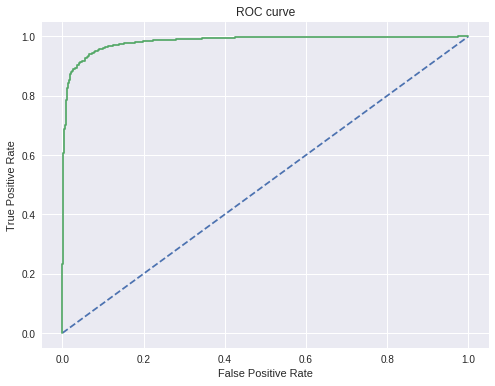

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, 1], [0, 1], linestyle='--')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_figheight'

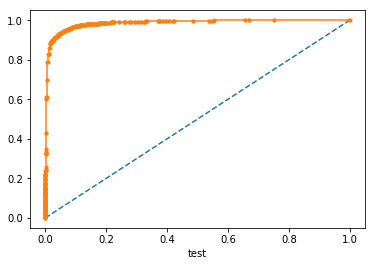

In [26]:

plt.
plt.plot(fpr, tpr, marker='.')
plt.xlabel('test')
plt.set_figheight(15)
plt.set_figwidth(15)

In [13]:
y_predictions

array([[0.99833924],
       [0.02778235],
       [0.8600921 ],
       ...,
       [0.99594784],
       [0.9872041 ],
       [0.97078866]], dtype=float32)

In [5]:
vocab_list = []
with open('vocab.json', 'r') as f:
    for line in f:
        vocab_list.append(line[10:-3])

In [6]:
y_test[7]

1.0

In [7]:
for i, row in enumerate(X_test[50:]):
    for i, val in enumerate(row):
        if val != 0:
            print(vocab_list[i])
    print('*'*50)
    if i == 50:
        break

the
a
to
it
of
in
for
not

has
about
up
little
after
two
used
fit
small
though
seems
fine
couple
although
hold
sturdy
head
future
uses
handle
except
held
brush
onto
nails
loosely
optimistic
**************************************************
the
and
i
a
it
of
is
this
my
was
on
but
not
so
be
they
all
its
at
from
would
them
really
time
than
were
buy
back
made
never
didnt
right
same
different
both
around
thought
purchased
color
away
expected
anything
side
kind
black
white
based
pocket
fabric
lightweight
clothes
suit
threw
badly
photographs
navy
skirt
producer
considerably
shrunk
frayed
linen
drape
taupe
muslin
periwinkle
**************************************************
it
one
works
star
**************************************************
the
i
a
to
it
of
in
was
but
not
as
great
one
all
from
an
would
about
well
product
she
after
then
our
long
purchased
worked
days
1
house
10
completely
month
front
stop
hoping
near
purchasing
protect
considering
additional
began
eating
initially
plants
flow

**************************************************
the
of
in
very
were
after
quality
long
color
disappointed
wrong
sent
items
bands
receiving
anticipation
**************************************************
the
and
a
it
of
is
in
that
with
you
so
all
its
like
at
from
if
an
or

stars
can
read
no
much
-
story
works
way
any
think
life
years
old
every
fun
say
being
those
though
light
real
fast
away
wish
wont
true
id
maybe
within
learn
food
coming
woman
starts
ask
boring
fantasy
stuck
realistic
25
pleasure
marriage
fish
compare
follows
cake
empty
golden
fairy
calories
lemon
guilty
limits
minus
expectation
much<br
cinderella
suspend
fulfillment
limitation
cliché
godmother
orgy
acquires
forgotten<br
**************************************************
i
a
is
this
for
was
not
have
book
good
would
had
over
4
otherwise
paid
known
content
inches
informed
meditation
miniature
$11
**************************************************
the
and
i
a
to
it
of
is
this
in
for
that
my
was
on
but
not
have
so
one
<

In [3]:
X_test.shape

(100, 78133)

In [4]:
y_test[y_test == 1].shape


(50,)

In [16]:
#defines autoencoder model

# this is our input placeholder
input_img = Input(shape=(X_test.shape[1],))

# first encoding layer
encoded1 = Dense(units = 1000, activation = 'relu', name='layer1_256')(input_img)

"""    # second encoding layer
# note that each layer is multiplied by the layer before
encoded2 = Dense(units = 200, activation='relu', name='layer2_64')(encoded1)"""

# first decoding layer
decoded1 = Dense(units = 1500, activation='relu', name='layer4')(encoded1)
decoded2 = Dense(units = 1500, activation='relu', name='layer5')(decoded1)
decoded3 = Dense(units = 1500, activation='relu', name='layer6')(decoded2)
# second decoding layer - this produces the output
#decoded2 = Dense(units = X_test.shape[1], activation='sigmoid', name='layer4_output')(decoded1)

prediction_layer = Dense(units = 1, activation='sigmoid', name='prediction')(decoded3)
# this model maps an input to its reconstruction
model = Model(input_img, prediction_layer)

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [17]:
autoencoder_model_created = False
model_path = 'models/basic_autoencoder1.h5'

if not autoencoder_model_created:

    batch_size = 50
    nb_epoch = 10
    samples_per_epoch = 15

    # instantiate callbacks
    tensorboard = TensorBoard(log_dir='./autoencoder_logs', histogram_freq=2, batch_size=batch_size, write_graph=True, write_grads=True, write_images=True)
    earlystopping = EarlyStopping(monitor='val_loss', patience=2)

    # try different number of epochs - 10 gives good performanace 
    """model.fit(X_train, X_train, epochs=10, batch_size=batch_size, verbose=1,
              validation_split=0.1, callbacks = [earlystopping, tensorboard])""" # cross val to estimate test error


    model.fit_generator(generator=batch_generator('/home/tyler/data_hd/train_data', batch_size),
                        epochs=nb_epoch,
                        steps_per_epoch=samples_per_epoch)


    scores = model.evaluate(X_test, y_test)
    print('Test mse = {}'.format(scores[0]))

    y_predictions = model.predict(X_test)
    
    #model.save(model_path)

else:
    pass
    """model = load_model(model_path)
    scores = model.evaluate(X_test, X_test)
    print('Test mse = {}'.format(scores[0]))"""


Epoch 1/10


ResourceExhaustedError: OOM when allocating tensor of shape [78133,1000] and type float
	 [[node training_4/Adam/zeros_10 (defined at /home/tyler/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:702) ]]

Caused by op 'training_4/Adam/zeros_10', defined at:
  File "/home/tyler/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tyler/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/tyler/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/home/tyler/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/home/tyler/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-9696ea0f32a1>", line 21, in <module>
    steps_per_epoch=samples_per_epoch)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 1418, in fit_generator
    initial_epoch=initial_epoch)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/engine/training_generator.py", line 40, in fit_generator
    model._make_train_function()
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/engine/training.py", line 509, in _make_train_function
    loss=self.total_loss)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/optimizers.py", line 488, in get_updates
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/optimizers.py", line 488, in <listcomp>
    vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py", line 702, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 1817, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3367, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/tyler/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [78133,1000] and type float
	 [[node training_4/Adam/zeros_10 (defined at /home/tyler/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:702) ]]


In [ ]:
confusions = confusion_matrix(y_test, y_predictions < 0.5)

In [ ]:
confusions

In [ ]:
true_negative = confusions[0,0]
false_positive = confusions[0,1]
false_negative = confusions[1, 0]
true_positive = confusions[1, 1]

In [ ]:
print('Recall: {:0.2f}'.format(true_positive / (true_positive + false_negative)))
print('Precision: {:0.2f}'.format(true_positive / (true_positive + false_positive)))

In [50]:
accuracy = 0.93592
true_positive = 40267
true_negative = 6529
false_positive = 395
false_negative = 2809


In [51]:
conf_df = pd.DataFrame([[true_positive, false_positive], [false_negative, true_negative]], \
                       ['predicted positive', 'predicted negative'], \
                       ['condition positive', 'condition negative'])


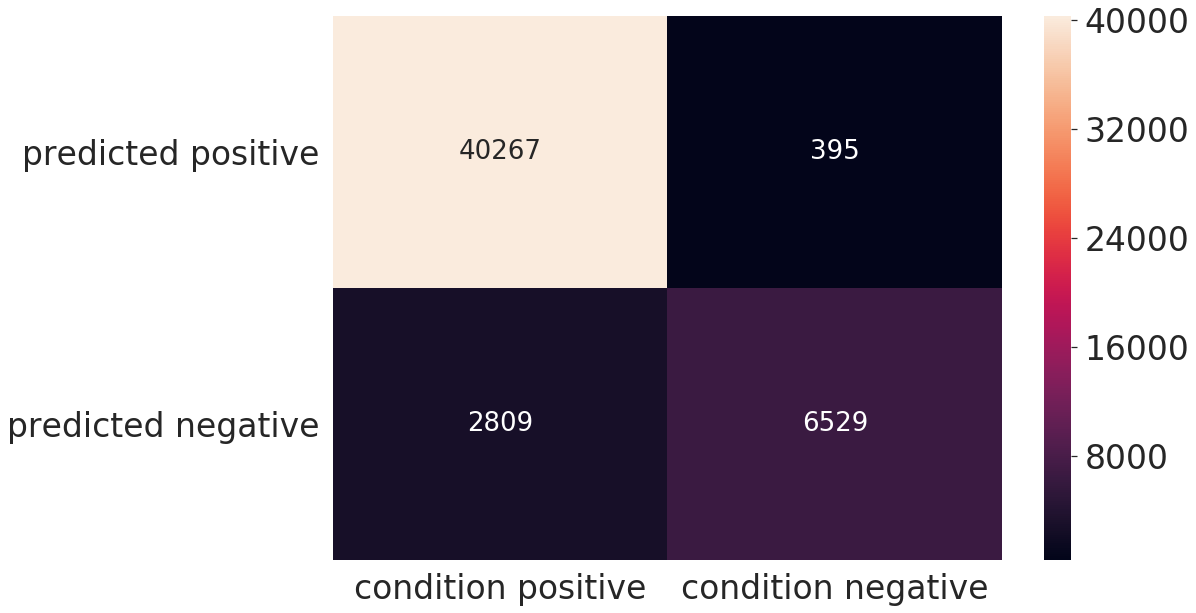

In [52]:
plt.figure(figsize=(15,10))
sn.set(font_scale=3)
sn.heatmap(conf_df, annot=True, annot_kws={'size': 26}, fmt='g')

In [ ]:
X_test_decoded[X_test_decoded < 0.5].shape

In [ ]:
X_test_decoded[X_test_decoded < 0.5].shape

In [ ]:
X_test_decoded[X_test_decoded < 0.5].shape

In [ ]:
X_test_decoded[X_test_decoded < 0.5].shape

In [ ]:
y_test.shape

In [ ]:
y_test[y_test == 1].shape

In [ ]:
X_test_decoded